Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

#Importing Skin Cancer Data

To do: Take necessary actions to read the data

#Importing all the important libraries

In [135]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [136]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('/content/drive/MyDrive/content/gdrive/SkinCancer/Train')
data_dir_test = pathlib.Path('/content/drive/MyDrive/content/gdrive/SkinCancer/Test')

In [137]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2249
118


#Load using keras.preprocessing
Let's load these images off disk using the helpful image_dataset_from_directory utility.

In [138]:
batch_size = 32
img_height = 180
img_width = 180

#Create a dataset
Define some parameters for the loader:

In [139]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=batch_size,
                                                               image_size=(img_height,img_width), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)

Found 24749 files belonging to 9 classes.
Using 19800 files for training.


In [140]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,
                                                            image_size=(img_height,img_width), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)

Found 24749 files belonging to 9 classes.
Using 4949 files for validation.


In [141]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


#Visualize the data
Todo, create a code to visualize one instance of all the nine classes present in the dataset

Found 6749 files belonging to 9 classes.


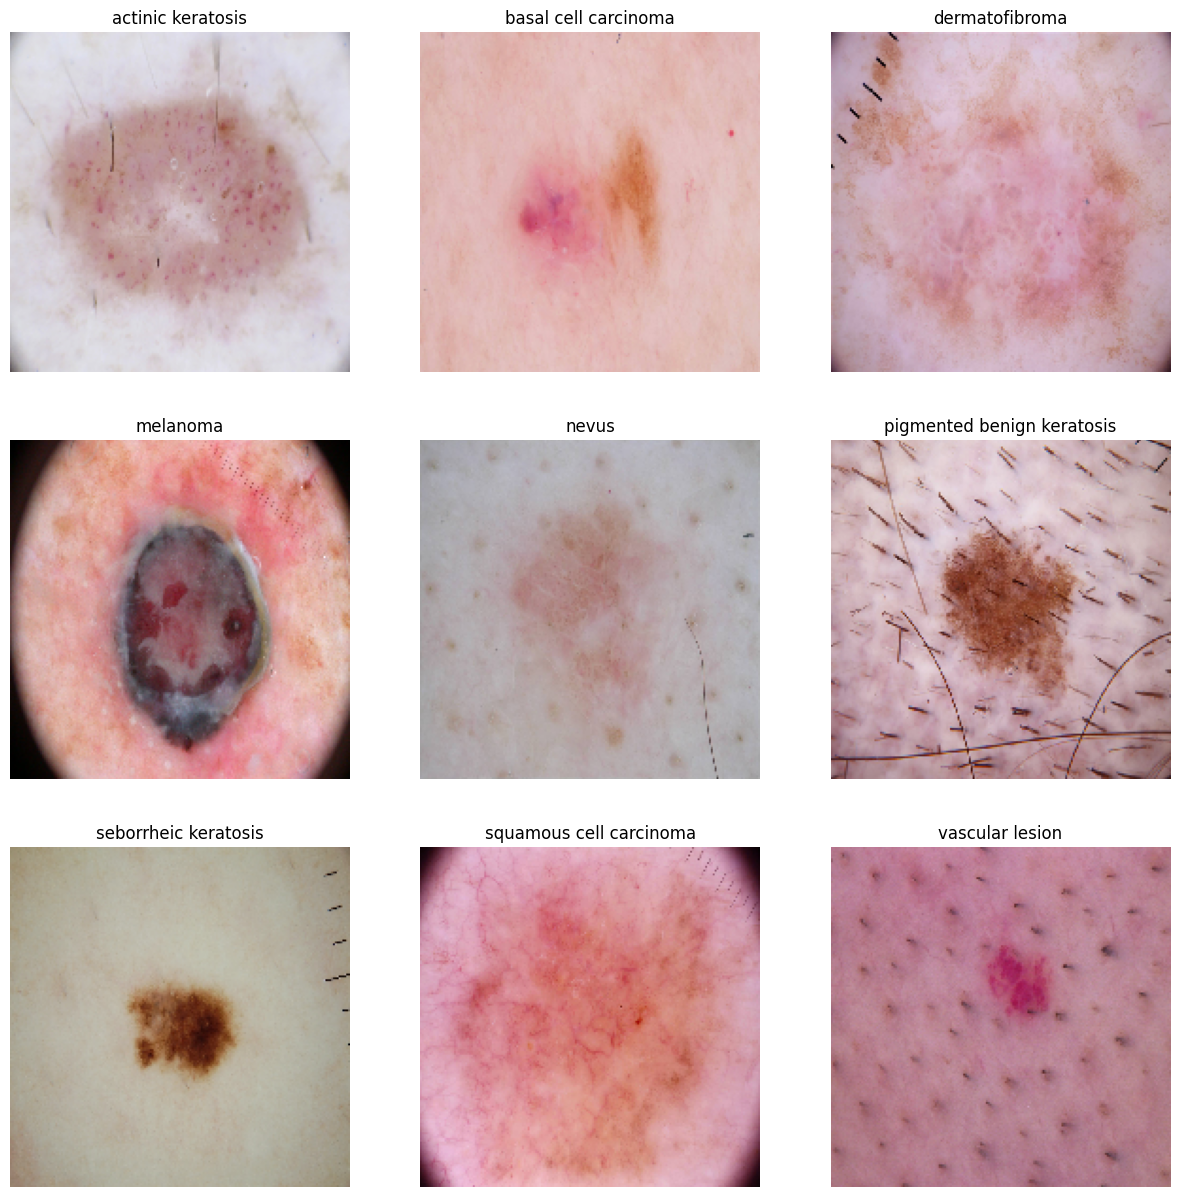

In [43]:
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,image_size=(180,180),
                                                                    label_mode='categorical',seed=123)

#all the classes of Skin Cancer
class_names = image_dataset.class_names

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))

#Visualize image
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(180,180)))
    plt.title(c)
    plt.axis("off")

In [44]:
def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

Class  No. of Image
0           actinic keratosis           114
1        basal cell carcinoma           376
2              dermatofibroma            95
3                    melanoma           441
4                       nevus           357
5  pigmented benign keratosis           469
6        seborrheic keratosis            77
7     squamous cell carcinoma           181
8             vascular lesion           139

<Axes: xlabel='No. of Image', ylabel='Class'>

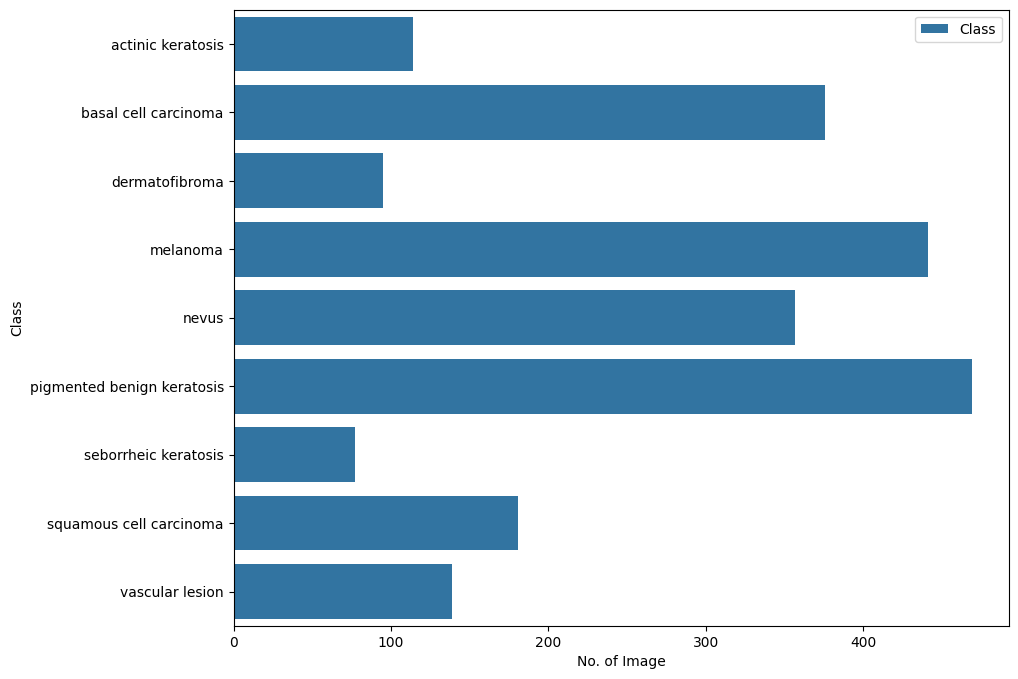

In [45]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#Create the model : 1
Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [8]:
### Your code goes here
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  #We slide over the feature map and extract tiles of a specified size.
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  #We slide over the feature map and extract tiles of a specified size.
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  #We slide over the feature map and extract tiles of a specified size.
  layers.MaxPooling2D(),
  #Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting
  layers.Flatten(),
  #Flattening - Convert into 1D feature vector.  Flattens all its structure to create a single long feature vector
  layers.Dense(128, activation='relu'),
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
  layers.Dense(num_classes)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
])

# vizualizing the model

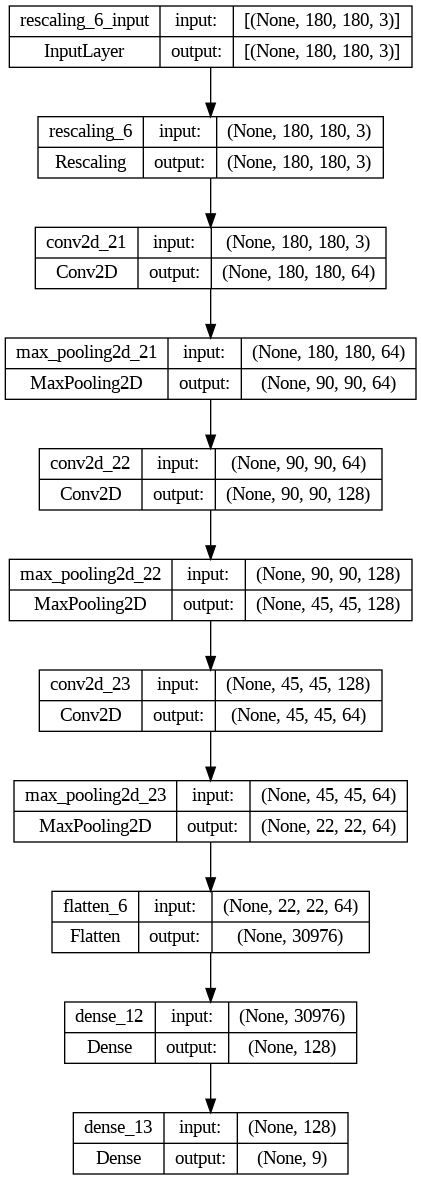

In [66]:
# vizualizing the model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#Compile the model
Choose an appropirate optimiser and loss function for model training

In [67]:
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [68]:
checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

#Train the model

In [69]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[checkpoint,earlystop]
)

Epoch 1/20
169/169 [==============================] - ETA: 0s - loss: 6.0895 - accuracy: 0.0922
Epoch 1: val_accuracy improved from -inf to 0.10378, saving model to model.h5
169/169 [==============================] - 918s 5s/step - loss: 6.0895 - accuracy: 0.0922 - val_loss: 4.5762 - val_accuracy: 0.1038
Epoch 2/20
169/169 [==============================] - ETA: 0s - loss: 4.3340 - accuracy: 0.0924
Epoch 2: val_accuracy did not improve from 0.10378
169/169 [==============================] - 918s 5s/step - loss: 4.3340 - accuracy: 0.0924 - val_loss: 4.5762 - val_accuracy: 0.1038
Epoch 3/20
169/169 [==============================] - ETA: 0s - loss: 4.3340 - accuracy: 0.0924
Epoch 3: val_accuracy did not improve from 0.10378
169/169 [==============================] - 899s 5s/step - loss: 4.3340 - accuracy: 0.0924 - val_loss: 4.5762 - val_accuracy: 0.1038
Epoch 4/20
169/169 [==============================] - ETA: 0s - loss: 4.3340 - accuracy: 0.0924
Epoch 4: val_accuracy did not improve fr

#Visualizing training results

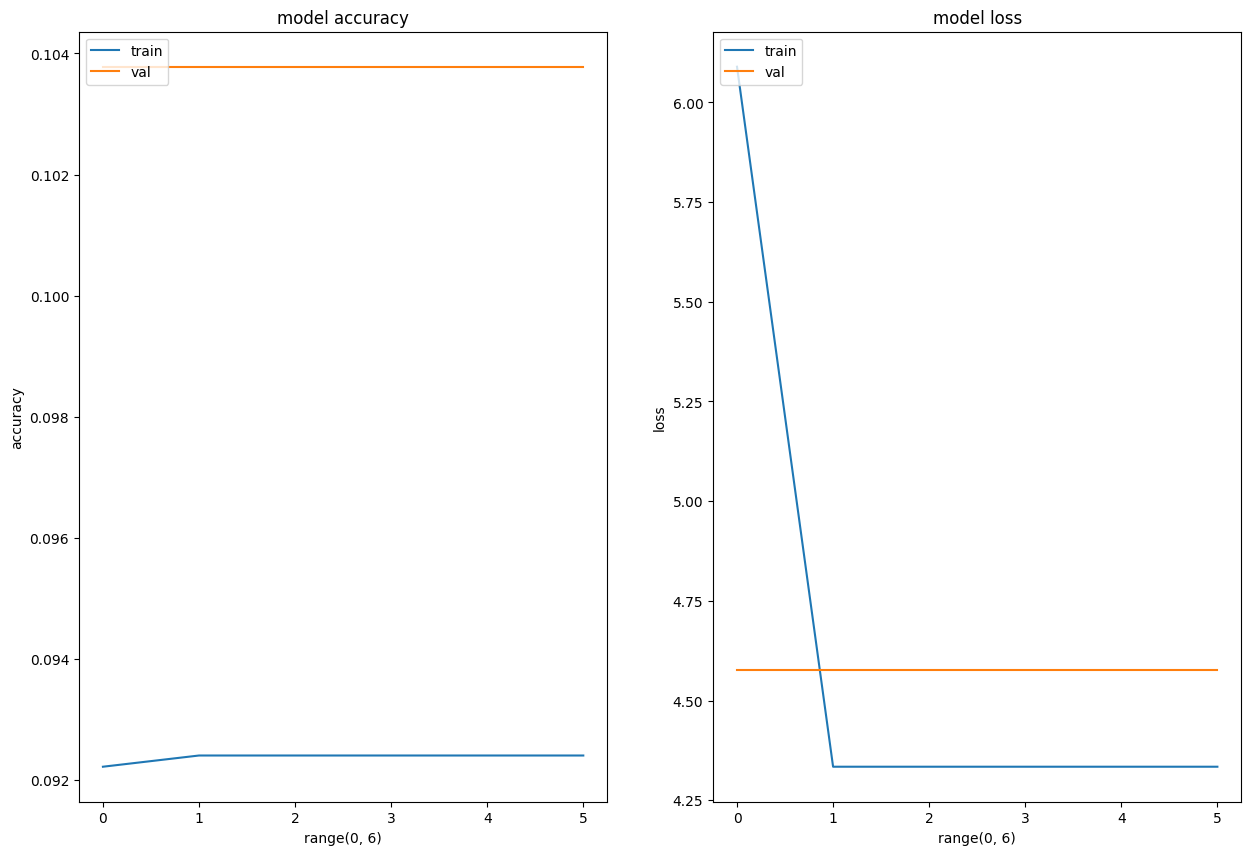

In [70]:
epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

#Observation : This model is showing not at all good accuracy and looks too much underfit

#Model 2: Trying another Model with data_augmentation

In [9]:

# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomTranslation(1,.5,fill_mode="reflect",interpolation="bilinear",seed=None,fill_value=0.0),
    layers.experimental.preprocessing.RandomCrop(img_height,img_width),
  ]
)

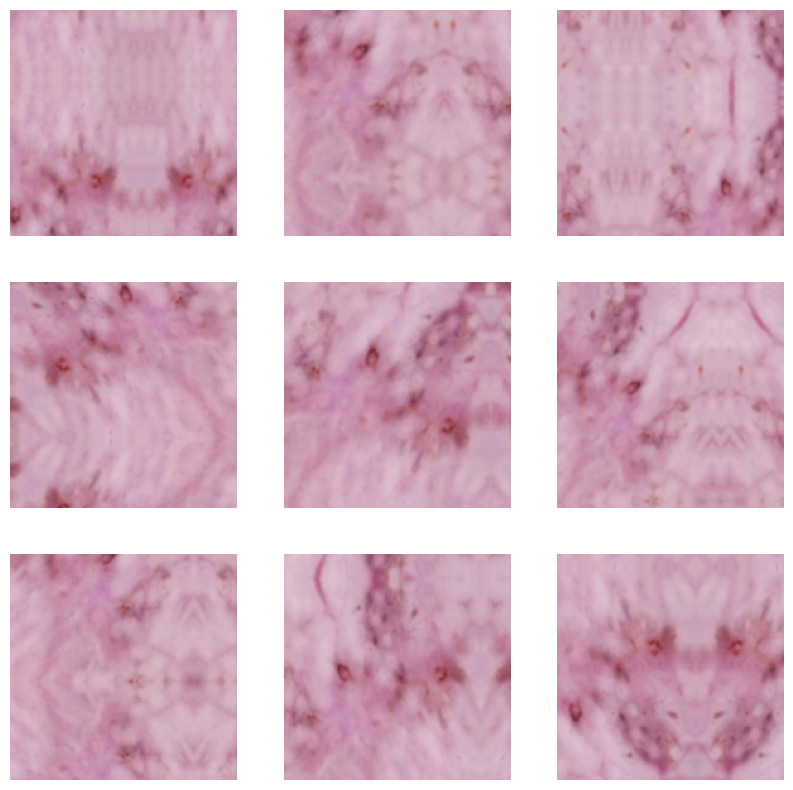

In [72]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [70]:

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

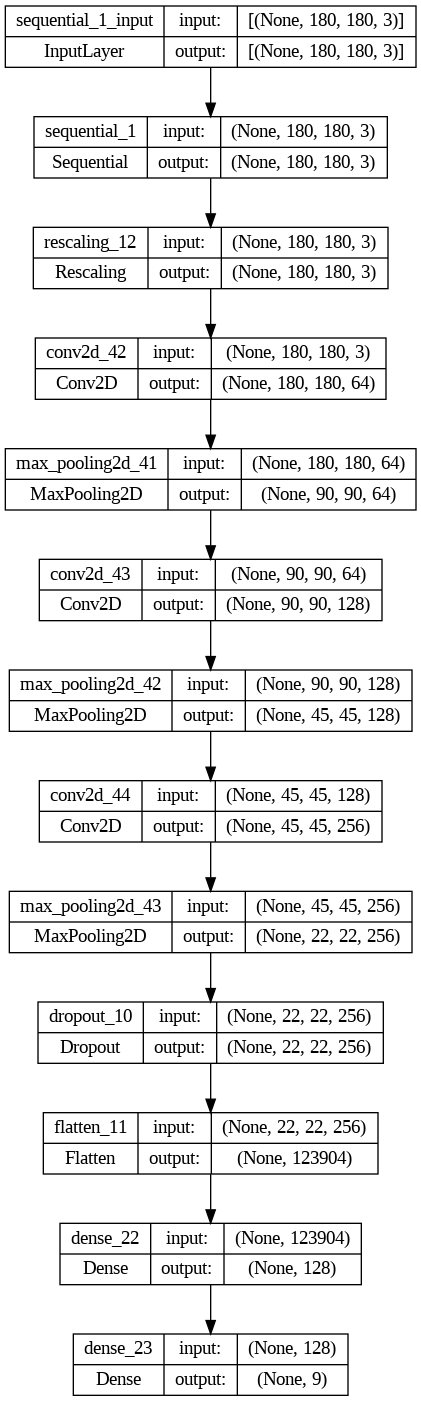

In [71]:
# vizualizing the model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
## Your code goes here
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [12]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 420s 2s/step - loss: 6.9475 - accuracy: 0.1009 - val_loss: 6.9419 - val_accuracy: 0.0897
Epoch 2/20
169/169 [==============================] - 18s 101ms/step - loss: 6.7905 - accuracy: 0.0915 - val_loss: 6.9419 - val_accuracy: 0.0897
Epoch 3/20
169/169 [==============================] - 18s 100ms/step - loss: 6.7905 - accuracy: 0.0917 - val_loss: 6.9419 - val_accuracy: 0.0897
Epoch 4/20
169/169 [==============================] - 17s 99ms/step - loss: 6.7905 - accuracy: 0.0913 - val_loss: 6.9419 - val_accuracy: 0.0897
Epoch 5/20
169/169 [==============================] - 17s 99ms/step - loss: 6.7905 - accuracy: 0.0913 - val_loss: 6.9419 - val_accuracy: 0.0897
Epoch 6/20
169/169 [==============================] - 17s 98ms/step - loss: 6.7905 - accuracy: 0.0913 - val_loss: 6.9419 - val_accuracy: 0.0897
Epoch 7/20
169/169 [==============================] - 17s 98ms/step - loss: 6.7905 - accuracy: 0.0913 - val_loss: 6.9419 - val_accuracy

#Visualizing the results

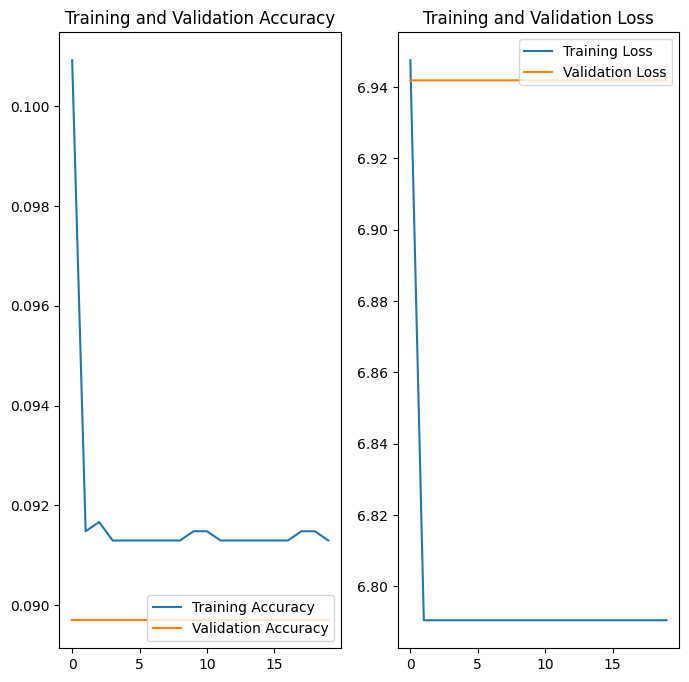

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Observation : This model is showing not at all good accuracy and looks too much underfit

###Find the distribution of classes in the training dataset.
###Context: Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [14]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2249

In [15]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

Path              Label
0     /content/drive/MyDrive/content/gdrive/SkinCanc...  actinic keratosis
1     /content/drive/MyDrive/content/gdrive/SkinCanc...  actinic keratosis
2     /content/drive/MyDrive/content/gdrive/SkinCanc...  actinic keratosis
3     /content/drive/MyDrive/content/gdrive/SkinCanc...  actinic keratosis
4     /content/drive/MyDrive/content/gdrive/SkinCanc...  actinic keratosis
...                                                 ...                ...
2244  /content/drive/MyDrive/content/gdrive/SkinCanc...    vascular lesion
2245  /content/drive/MyDrive/content/gdrive/SkinCanc...    vascular lesion
2246  /content/drive/MyDrive/content/gdrive/SkinCanc...    vascular lesion
2247  /content/drive/MyDrive/content/gdrive/SkinCanc...    vascular lesion
2248  /content/drive/MyDrive/content/gdrive/SkinCanc...    vascular lesion

[2249 rows x 2 columns]

Class=0, n=114 (5.069%)
Class=1, n=376 (16.719%)
Class=2, n=95 (4.224%)
Class=3, n=441 (19.609%)
Class=4, n=357 (15.874%)
Class=5, n=469 (20.854%)
Class=6, n=77 (3.424%)
Class=7, n=181 (8.048%)
Class=8, n=139 (6.181%)


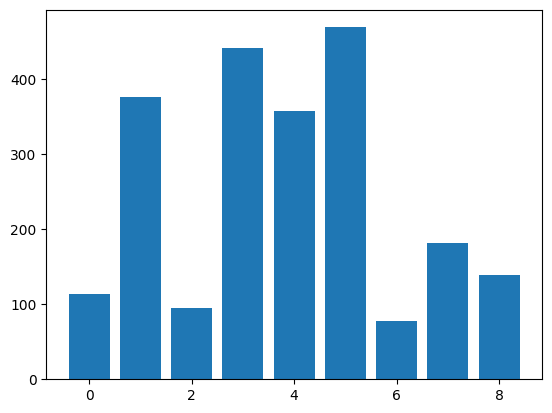

In [16]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

##findings here:
- Which class has the least number of samples? - seborrheic keratosis
- Which classes dominate the data in terms proportionate number of samples? - pigmented benign keratosis
## Rectify the class imbalance
Context: You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [142]:
#install Augmentor
!pip install Augmentor

In [143]:
path_to_training_dataset='/content/drive/MyDrive/content/gdrive/SkinCancer/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)  #Adding 500 samples per class to make sure that none of the classes are sparse

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/content/gdrive/SkinCancer/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x783370620850>: 100%|██████████| 500/500 [00:05<00:00, 96.13 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/content/gdrive/SkinCancer/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x783354549E40>: 100%|██████████| 500/500 [00:05<00:00, 98.30 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/content/gdrive/SkinCancer/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7832E046DB10>: 100%|██████████| 500/500 [00:06<00:00, 81.28 Samples/s]


Initialised with 441 image(s) found.
Output directory set to /content/drive/MyDrive/content/gdrive/SkinCancer/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7832C036EAA0>: 100%|██████████| 500/500 [00:20<00:00, 23.85 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/content/gdrive/SkinCancer/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=824x719 at 0x7832C1D83C10>: 100%|██████████| 500/500 [00:17<00:00, 29.34 Samples/s]


Initialised with 469 image(s) found.
Output directory set to /content/drive/MyDrive/content/gdrive/SkinCancer/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7832C19257B0>: 100%|██████████| 500/500 [00:05<00:00, 95.40 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/content/gdrive/SkinCancer/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7832C06FCB50>: 100%|██████████| 500/500 [00:09<00:00, 52.68 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/content/gdrive/SkinCancer/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x783370623640>: 100%|██████████| 500/500 [00:05<00:00, 95.80 Samples/s] 


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/content/gdrive/SkinCancer/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7832F41EA350>: 100%|██████████| 500/500 [00:05<00:00, 93.22 Samples/s]


To use Augmentor, the following general procedure is followed:

Instantiate a Pipeline object pointing to a directory containing your initial image data set.
Define a number of operations to perform on this data set using your Pipeline object.
Execute these operations by calling the Pipeline’s sample() method.

Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [21]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

13500


#Lets see the distribution of augmented data after adding new images to the original training data.

In [22]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/drive/MyDrive/content/gdrive/SkinCancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026525.jpg_a85ab2ff-e523-4395-bbcc-16d3b1b21015.jpg',
 '/content/drive/MyDrive/content/gdrive/SkinCancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029915.jpg_aa080896-92ff-454e-be6c-367c2c272b87.jpg',
 '/content/drive/MyDrive/content/gdrive/SkinCancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027452.jpg_2468bb3c-c9d4-427b-8185-699fb8ffe471.jpg',
 '/content/drive/MyDrive/content/gdrive/SkinCancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026702.jpg_eee1c9ba-dd97-4c3e-9ea7-28905e8f3385.jpg',
 '/content/drive/MyDrive/content/gdrive/SkinCancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027896.jpg_b612e086-8a5d-4667-a8b7-33d0b10baa42.jpg',
 '/content/drive/MyDrive/content/gdrive/SkinCancer/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027829.jpg_88889b39-def4-4d1c-9ad4-09a6e

In [23]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [24]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [27]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df._append(df2)

In [28]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    1969
melanoma                      1941
basal cell carcinoma          1876
nevus                         1857
squamous cell carcinoma       1681
vascular lesion               1639
actinic keratosis             1614
dermatofibroma                1595
seborrheic keratosis          1577
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

# Train the model on the data created using Augmentor

In [123]:

batch_size = 32
img_height = 180
img_width = 180

# Create a training dataset

In [124]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 24749 files belonging to 9 classes.
Using 19800 files for training.


# Create a validation dataset

In [125]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 24749 files belonging to 9 classes.
Using 4949 files for validation.


#Model 3: Create your model (make sure to include normalization)

In [32]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# Compile your model (Choose optimizer and loss function appropriately)

In [33]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train your model

In [34]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
394/394 [==============================] - 46s 32ms/step - loss: 1.6923 - accuracy: 0.3441 - val_loss: 1.3057 - val_accuracy: 0.4967
Epoch 2/20
394/394 [==============================] - 5s 13ms/step - loss: 1.1591 - accuracy: 0.5656 - val_loss: 1.0886 - val_accuracy: 0.5942
Epoch 3/20
394/394 [==============================] - 5s 13ms/step - loss: 0.8591 - accuracy: 0.6805 - val_loss: 0.8424 - val_accuracy: 0.6996
Epoch 4/20
394/394 [==============================] - 5s 13ms/step - loss: 0.6208 - accuracy: 0.7734 - val_loss: 0.5696 - val_accuracy: 0.7936
Epoch 5/20
394/394 [==============================] - 5s 13ms/step - loss: 0.4673 - accuracy: 0.8313 - val_loss: 0.5377 - val_accuracy: 0.8231
Epoch 6/20
394/394 [==============================] - 5s 13ms/step - loss: 0.3921 - accuracy: 0.8566 - val_loss: 0.4502 - val_accuracy: 0.8460
Epoch 7/20
394/394 [==============================] - 5s 13ms/step - loss: 0.3158 - accuracy: 0.8821 - val_loss: 0.3721 - val_accuracy: 0.881

# Visualize the model results

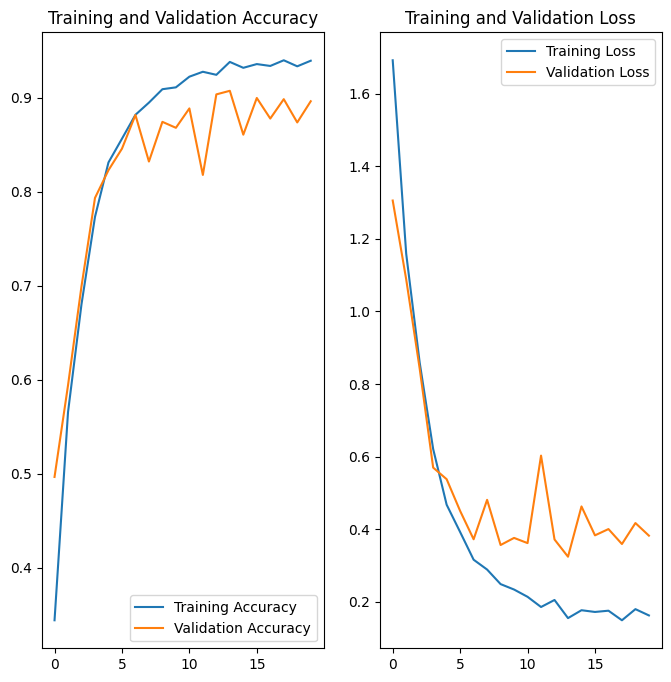

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Observation : This model is showing good accuracy for both train ~94% and validation dataset ~90% which is good accuracy.

#Model Prediction

1/1 [==============================] - 0s 198ms/step
Actual Class basal cell carcinoma
Predictive Class basal cell carcinoma


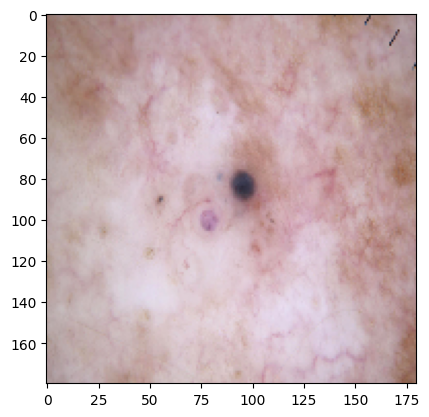

In [36]:
from glob import glob
Test_image_path = os.path.join(data_dir_test, class_names[1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[1] +'\n'+ "Predictive Class "+pred_class )

#Model 4 : To add more layers to record the changes

In [65]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  #layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  #layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  #layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  #layers.BatchNormalization(),
  layers.MaxPooling2D(),
  #layers.Conv2D(256, 3, padding='same', activation='relu'),
  #layers.BatchNormalization(),
  #layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])

#Compile the Model

In [66]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Train The Model

In [67]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
394/394 [==============================] - 11s 23ms/step - loss: 1.6670 - accuracy: 0.3483 - val_loss: 1.4309 - val_accuracy: 0.4233
Epoch 2/20
394/394 [==============================] - 9s 23ms/step - loss: 1.2769 - accuracy: 0.5115 - val_loss: 1.0405 - val_accuracy: 0.5872
Epoch 3/20
394/394 [==============================] - 9s 22ms/step - loss: 0.9746 - accuracy: 0.6308 - val_loss: 0.7466 - val_accuracy: 0.7190
Epoch 4/20
394/394 [==============================] - 9s 23ms/step - loss: 0.7052 - accuracy: 0.7337 - val_loss: 0.5000 - val_accuracy: 0.8206
Epoch 5/20
394/394 [==============================] - 9s 22ms/step - loss: 0.5084 - accuracy: 0.8029 - val_loss: 0.4112 - val_accuracy: 0.8488
Epoch 6/20
394/394 [==============================] - 9s 23ms/step - loss: 0.4124 - accuracy: 0.8458 - val_loss: 0.4242 - val_accuracy: 0.8403
Epoch 7/20
394/394 [==============================] - 9s 22ms/step - loss: 0.3190 - accuracy: 0.8783 - val_loss: 0.2930 - val_accuracy: 0.899

#Visulaize The Model Accuracy

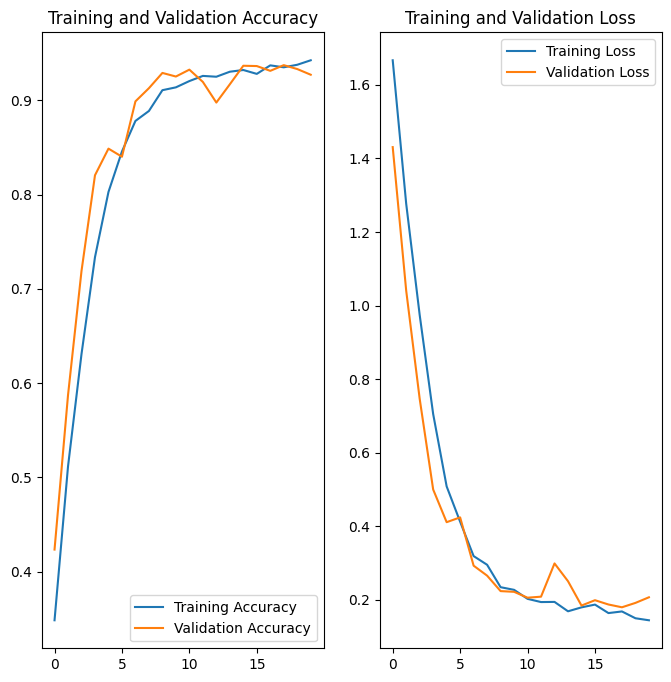

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)



plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Observation: This Model shows the better accuracy for Train ~94% and Test ~92% and the pattern also shows similar patterns.

#Model Prediction

1/1 [==============================] - 0s 167ms/step
Actual Class basal cell carcinoma
Predictive Class basal cell carcinoma


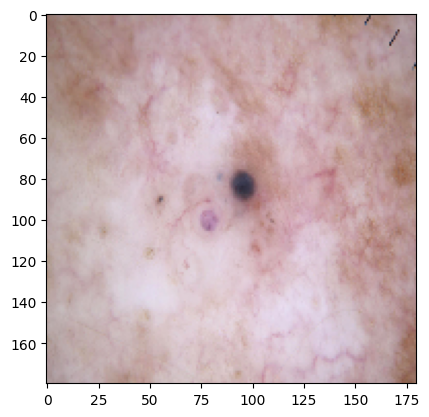

In [69]:
from glob import glob
Test_image_path = os.path.join(data_dir_test, class_names[1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[1] +'\n'+ "Predictive Class "+pred_class )

#Model 5 : To added more layers and used final activation as Softmax as it is multilayer classification

#Build Model

In [174]:


AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  #layers.Dropout(0.25),

  layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
 # layers.Dropout(0.25),

  layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  #layers.Dropout(0.5),

  #layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
 # layers.MaxPooling2D(pool_size=(2,2)),
 # layers.Dropout(0.5),


  # layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'),
 # layers.MaxPooling2D(pool_size=(2,2)),
 # layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'),
 # layers.MaxPooling2D(pool_size=(2,2)),
 # layers.Dropout(0.5),
  #layers.BatchNormalization(),

  #layers.Conv2D(128, 3, padding='same', activation='relu'),
  #layers.BatchNormalization(),
 # layers.MaxPooling2D(),
 # layers.Conv2D(256, 3, padding='same', activation='relu'),
 ## layers.BatchNormalization(),
  #layers.MaxPooling2D(),
  #layers.Conv2D(256, 3, padding='same', activation='relu'),
  #layers.BatchNormalization(),
  #layers.MaxPooling2D(),

  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  #layers.Dropout(0.2),
  layers.Dense(num_classes,activation="softmax")
])

#Comple The Model

In [175]:
## your code goes here
#optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False)
model.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])
#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
checkpoint = ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

#Stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

#Train The Model

In [176]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,callbacks=[checkpoint,earlystop]
)

Epoch 1/20
617/619 [============================>.] - ETA: 0s - loss: 1.5307 - accuracy: 0.4151
Epoch 1: val_accuracy improved from -inf to 0.54193, saving model to model.h5
619/619 [==============================] - 12s 16ms/step - loss: 1.5291 - accuracy: 0.4158 - val_loss: 1.1805 - val_accuracy: 0.5419
Epoch 2/20
617/619 [============================>.] - ETA: 0s - loss: 0.9893 - accuracy: 0.6375
Epoch 2: val_accuracy improved from 0.54193 to 0.71610, saving model to model.h5
619/619 [==============================] - 10s 16ms/step - loss: 0.9878 - accuracy: 0.6382 - val_loss: 0.7649 - val_accuracy: 0.7161
Epoch 3/20
617/619 [============================>.] - ETA: 0s - loss: 0.6212 - accuracy: 0.7774
Epoch 3: val_accuracy improved from 0.71610 to 0.79026, saving model to model.h5
619/619 [==============================] - 10s 16ms/step - loss: 0.6205 - accuracy: 0.7777 - val_loss: 0.5675 - val_accuracy: 0.7903
Epoch 4/20
617/619 [============================>.] - ETA: 0s - loss: 0.4

#Visualize The Model

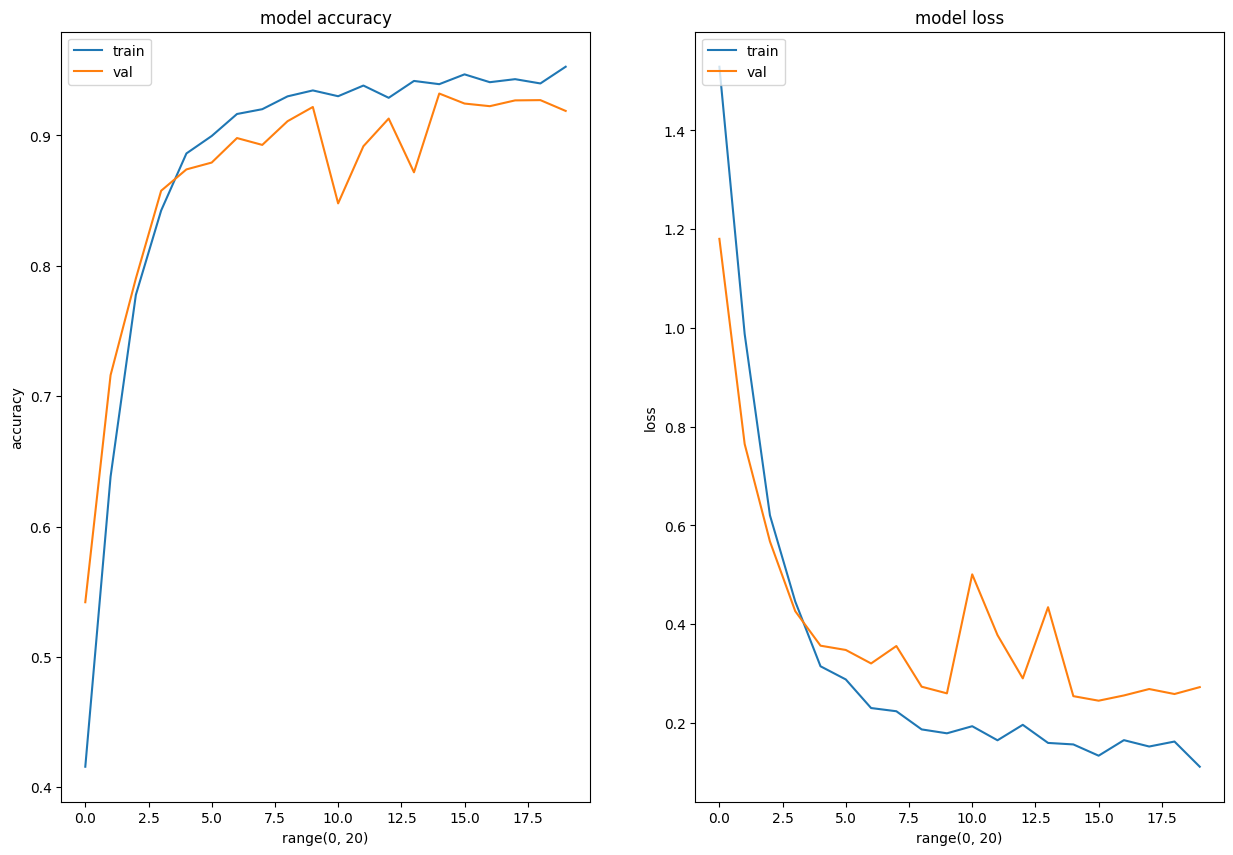

In [177]:
# Plot the training curves

epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Observation: This Model shows the better accuracy for Train ~95% and Test ~92% and loss seems going down for validation.This could be cosiderable model as Softmax activation is used here for final layer as it is multiclass classification.

#Model Prediction

1/1 [==============================] - 0s 198ms/step
Actual Class basal cell carcinoma
Predictive Class basal cell carcinoma


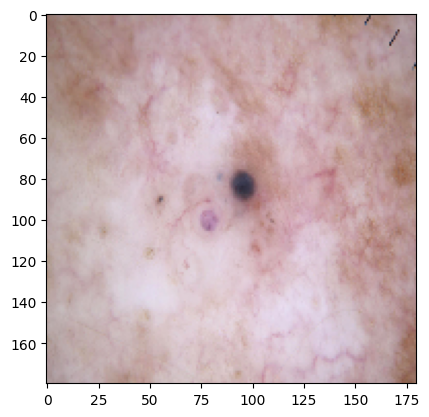

In [ ]:
from glob import glob
Test_image_path = os.path.join(data_dir_test, class_names[1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[1] +'\n'+ "Predictive Class "+pred_class )